Sources: #Modified this code from https://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb


In [3]:
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import gym

import math
%config InlineBackend.figure_format = 'retina'

In [4]:
Tensor = torch.Tensor

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# For egreedy algorithm
def calculate_epsilon(steps_done):
    import math
    epsilon = egreedy_final + (egreedy - egreedy_final) * \
              math.exp(-1. * steps_done / egreedy_decay)
    
    return epsilon

# Network Class

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(num_inputs, num_outputs)
        
    def forward(self, x):
        output = self.linear1(x)
        return output

class QNet_Agent(object):
    def __init__(self):
        self.nn = NeuralNetwork().to(device)
        self.loss_func = nn.MSELoss()
        self.optimizer = optim.Adam(params=self.nn.parameters(), lr=learning_rate)
    
    def select_action(self, state, epsilon):
        
        random_for_egreedy = float(torch.rand(1))
        if random_for_egreedy > epsilon:
            
            with torch.no_grad():
                state = Tensor(state).to(device)
                actions_from_nn = self.nn(state) 
                action.torch.max(actions_from_nn,0)[1]
                action = action.item()
        
        else:
            action = env.action_space.sample()
        
        
        return action
    
    def optimize(self, state, action, new_state, reward, done):
        
        #Use Bellman Equation Definitions
        state     = Tensor(state).to(device)
        new_state = Tensor(new_state).to(device)
        reward    = Tensor([reward]).to(device)
        
        if done: 
            target_value  = reward
        else:
            # Bellman
            new_state_values = self.nn(new_state).detach() #No need for gradient
            max_new_state_values = torch.max(new_state_values)
            target_value = reward + gamma * max_new_state_values
        
        predicted_value = self.nn(state)[action]
        
        loss = self.loss_func(predicted_value, target_value)
    
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        

In [5]:
env = gym.make('CartPole-v0')

observation = env.reset()


# Initializations
cum_reward = 0
frames = []
shadow_run = {}
steps_total = []
f_total = 0


# Parameters
learning_rate = 0.01
num_episodes = 5
gamma = .99

egreedy = .9
egreedy_final = .02
egreedy_decay = 500

num_inputs = env.observation_space.shape[0]
num_outputs = env.action_space.n

# Network
qnet_agent = QNet_Agent()
# Loss Function and Optimizer
optimizer = optim.Adam(params=mynn.parameters(), lr=learning_rate)

for episode in range(num_episodes):
    
    # Episode Initializations
    state = env.reset()
    shadow_run[episode] = {}
    actions, states, shots = [], [], []
    shadow_run[episode] = {}
    step = 0
    
    while True:
        
        # Add Step
        step += 1
        f_total += 1
        epsilon = calculate_epsilon(f_total)
        
        # Take Random Action
        # action = env.action_space.sample()
        
        # Use network to make decision
        action = qnet_agent.select_action(state, epsilon)
        
        # State Information
        new_state, reward, done, info = env.step(action)
        rendered = env.render(mode = 'rgb_array')
        
        # Agent Optimize
        qnet_agent.optimize(state, action, new_state, reward, done)

        # Store states for step
        actions.append(action)
        states.append(new_state)
        shots.append(rendered)

        #Frames is the largest collection
        frames.append(rendered)
      
        if done:
            steps_total.append(step)
            shadow_run[episode]["actions"] = actions
            shadow_run[episode]["states"] = states
            shadow_run[episode]["shots"] = shots
            shadow_run[episode]["steps"] = step
            
            print("Episode finished after %i steps" % step )
            break
               
        # Update state
        state = new_state

print("Average reward: {:.2f}".format(sum(steps_total)/num_episodes))

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), 
        steps_total, 
        alpha=0.6, 
        color='green',
        width= 1)
plt.show()

env.close()
env.env.close()

display_frames_as_gif(shadow_run[num_episodes - 1]["shots"], "Episode {}".format(num_episodes - 1))
display_frames(num_episodes-1)

/Users/michaelruggiero/anaconda3/envs/liveramp/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


NameError: name 'mynn' is not defined

In [ ]:
display_frames_as_gif(frames,"total_")

In [ ]:
eval("new_state")

In [ ]:
new_state

In [ ]:
display_frames_as_gif(frames, "last")

In [ ]:
steps_total

In [ ]:
for i in range(0,steps_total[0] + 1):
    plt.imshow(frames[i], alpha = .25)
plt.axis('off');

In [ ]:
import matplotlib

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
W = 2
b = .3
x = Variable(torch.arange(100).unsqueeze(1))

y = W * x + b

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch.autograd import Variable

# if gpu is to be used
use_cuda = torch.cuda.is_available()

device = torch.device("cuda:0" if use_cuda else "cpu")

W = 2
b = 0.3

#x = torch.arange(100,dtype=torch.float32).to(device).unsqueeze(1)
x = torch.arange(100).to(device = device, dtype = torch.float32).unsqueeze(1)

print(x.type()) 

y = W * x + b

###### PARAMS ######
learning_rate = 0.01
num_episodes = 1000


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(1,1)
        
    def forward(self, x):
        output = self.linear1(x)
        return output
    
mynn = NeuralNetwork().to(device)
    
loss_func = nn.MSELoss()
#loss_func = nn.SmoothL1Loss()

optimizer = optim.Adam(params=mynn.parameters(), lr=learning_rate)
#optimizer = optim.RMSprop(params=mynn.parameters(), lr=learning_rate)

for i_episode in range(num_episodes):
    
    predicted_value = mynn(x)
    
    loss = loss_func(predicted_value, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i_episode % 50 == 0:
        print("Episode %i, loss %.4f " % (i_episode, loss.item()))

In [ ]:
import gym
import torch
import random

import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')

num_episodes = 10

steps_total = []

for i_episode in range(num_episodes):
    # Episode Initializations
    state = env.reset()
    shadow_run[episode] = {}
    actions, states, shots = [], [], []
    shadow_run[episode] = {}
    step = 0

    while True:
        
        step += 1
        action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)
        
        #print(new_state)
        #print(info)
        
        #env.render()
        
        if done:
            steps_total.append(step)
            print("Episode finished after %i steps" % step )
            break
        

print("Average reward: %.2f" % (sum(steps_total)/num_episodes))
print("Average reward (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='green')
plt.show()

env.close()
env.env.close()

In [ ]:
#Modified this code from https://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import gym

import math
%config InlineBackend.figure_format = 'retina'

# if gpu is to be used
use_cuda = torch.cuda.is_available()

device = torch.device("cuda:0" if use_cuda else "cpu")
Tensor = torch.Tensor

env = gym.make('CartPole-v0')

###### PARAMS ######
learning_rate = 0.02
num_episodes = 25
gamma = 0.85

egreedy = 0.9
egreedy_final = 0.01
egreedy_decay = 500

####################

number_of_inputs = env.observation_space.shape[0]
number_of_outputs = env.action_space.n

def display_frames_as_gif(frames, title = ""):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    plt.title(title, fontdict={'fontsize': 50, 'fontweight': 'medium'})
    

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

def display_frames(episode):
    plt.figure(figsize=(shadow_run[0]["shots"][0].shape[1] / 72.0, shadow_run[0]["shots"][0].shape[0] / 72.0))
    
    for i in shadow_run[episode]["shots"]:
        plt.imshow(i, alpha = .25)
    plt.axis('off');
    plt.title("Number of steps: {}".format(shadow_run[episode]["steps"]),
              fontdict={'fontsize': 50, 'fontweight': 'medium'});

def calculate_epsilon(steps_done):
    epsilon = egreedy_final + (egreedy - egreedy_final) * \
              math.exp(-1. * steps_done / egreedy_decay )
    return epsilon


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(number_of_inputs,number_of_outputs)
        
    def forward(self, x):
        output = self.linear1(x)
        return output
    
class QNet_Agent(object):
    def __init__(self):
        self.nn = NeuralNetwork().to(device)

        self.loss_func = nn.MSELoss()
        #self.loss_func = nn.SmoothL1Loss()
        
        self.optimizer = optim.Adam(params=self.nn.parameters(), lr=learning_rate)
        #self.optimizer = optim.RMSprop(params=mynn.parameters(), lr=learning_rate)
        
    def select_action(self,state,epsilon):
        
        random_for_egreedy = torch.rand(1)[0]
        
        if random_for_egreedy > epsilon:      
            
            with torch.no_grad():
                
                state = Tensor(state).to(device)
                action_from_nn = self.nn(state)
                action = torch.max(action_from_nn,0)[1]
                action = action.item()        
        else:
            action = env.action_space.sample()
        
        return action
    
    def optimize(self, state, action, new_state, reward, done):
        
        state = Tensor(state).to(device)
        new_state = Tensor(new_state).to(device)
        
        reward = Tensor([reward]).to(device)
        
        if done:
            target_value = reward
        else:
            new_state_values = self.nn(new_state).detach()
            max_new_state_values = torch.max(new_state_values)
            target_value = reward + gamma * max_new_state_values
        
        predicted_value = self.nn(state)[action]
        
        loss = self.loss_func(predicted_value, target_value)
    
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
qnet_agent = QNet_Agent()

steps_total = []
frames_total = 0 
shadow_run = {}

for i_episode in range(num_episodes):
    # Episode Initializations
    state = env.reset()
    shadow_run[i_episode] = {}
    actions, states, shots = [], [], []
    step = 0

    while True:
        step += 1
        frames_total += 1
        
        epsilon = calculate_epsilon(frames_total)
        
        #action = env.action_space.sample()
        action = qnet_agent.select_action(state, epsilon)
        
        new_state, reward, done, info = env.step(action)
        rendered = env.render(mode = 'rgb_array')
        
        # Agent Optimize
        qnet_agent.optimize(state, action, new_state, reward, done)

        # Store states for step
        actions.append(action)
        states.append(new_state)
        shots.append(rendered)
                  
        if done:
            steps_total.append(step)
            shadow_run[i_episode]["actions"] = actions
            shadow_run[i_episode]["states"] = states
            shadow_run[i_episode]["shots"] = shots
            shadow_run[i_episode]["steps"] = step
            
            print("Episode {} finished after {} steps".format(i_episode, step))
            break
        
        state = new_state


print("Average reward: {:.2f}".format(sum(steps_total)/num_episodes))

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), 
        steps_total, 
        alpha=0.6, 
        color='green',
        width= 1)
plt.show()

env.close()
env.env.close()

display_frames_as_gif(shadow_run[num_episodes - 1]["shots"], "Episode {}".format(num_episodes - 1))
display_frames(num_episodes-1)

/Users/michaelruggiero/anaconda3/envs/liveramp/lib/python3.6/site-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Episode 0 finished after 12 steps
Episode 1 finished after 20 steps
Episode 2 finished after 10 steps
Episode 3 finished after 17 steps
Episode 4 finished after 32 steps
Episode 5 finished after 21 steps
Episode 6 finished after 17 steps
Episode 7 finished after 22 steps
Episode 8 finished after 14 steps
Episode 9 finished after 29 steps
Episode 10 finished after 14 steps
Episode 11 finished after 13 steps
Episode 12 finished after 12 steps
Episode 13 finished after 11 steps
Episode 14 finished after 9 steps
Episode 15 finished after 18 steps
Episode 16 finished after 18 steps
Episode 17 finished after 16 steps
Episode 18 finished after 15 steps
Episode 19 finished after 10 steps
Episode 20 finished after 13 steps
Episode 21 finished after 15 steps
Episode 22 finished after 13 steps
Episode 23 finished after 10 steps
Episode 24 finished after 11 steps
Episode 25 finished after 12 steps
Episode 26 finished after 8 steps
Episode 27 finished after 10 steps
Episode 28 finished after 16 ste

Episode 232 finished after 27 steps
Episode 233 finished after 16 steps
Episode 234 finished after 24 steps
Episode 235 finished after 28 steps
Episode 236 finished after 16 steps
Episode 237 finished after 15 steps
Episode 238 finished after 15 steps
Episode 239 finished after 20 steps
Episode 240 finished after 22 steps
Episode 241 finished after 28 steps
Episode 242 finished after 21 steps
Episode 243 finished after 16 steps
Episode 244 finished after 21 steps
Episode 245 finished after 16 steps
Episode 246 finished after 20 steps
Episode 247 finished after 18 steps
Episode 248 finished after 29 steps
Episode 249 finished after 17 steps
Episode 250 finished after 17 steps
Episode 251 finished after 15 steps
Episode 252 finished after 23 steps
Episode 253 finished after 17 steps
Episode 254 finished after 14 steps
Episode 255 finished after 23 steps
Episode 256 finished after 19 steps
Episode 257 finished after 24 steps
Episode 258 finished after 16 steps
Episode 259 finished after 2

In [1]:
#Modified this code from https://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import gym

import math
%config InlineBackend.figure_format = 'retina'

In [2]:
# if gpu is to be used
use_cuda = torch.cuda.is_available()

device = torch.device("cuda:0" if use_cuda else "cpu")
Tensor = torch.Tensor

env = gym.make('CartPole-v0')

###### PARAMS ######
learning_rate = 0.02
num_episodes = 1000
gamma = 0.85

egreedy = 0.9
egreedy_final = 0.01
egreedy_decay = 500

####################

number_of_inputs = env.observation_space.shape[0]
number_of_outputs = env.action_space.n

/Users/michaelruggiero/anaconda3/envs/liveramp/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [3]:
def display_frames_as_gif(frames, title = ""):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    plt.title(title, fontdict={'fontsize': 50, 'fontweight': 'medium'})
    

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

def display_frames(episode):
    plt.figure(figsize=(shadow_run[0]["shots"][0].shape[1] / 72.0, shadow_run[0]["shots"][0].shape[0] / 72.0))
    
    for i in shadow_run[episode]["shots"]:
        plt.imshow(i, alpha = .25)
    plt.axis('off');
    plt.title("Number of steps: {}".format(shadow_run[episode]["steps"]),
              fontdict={'fontsize': 50, 'fontweight': 'medium'});

def calculate_epsilon(steps_done):
    epsilon = egreedy_final + (egreedy - egreedy_final) * \
              math.exp(-1. * steps_done / egreedy_decay )
    return epsilon


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(number_of_inputs,number_of_outputs)
        
    def forward(self, x):
        output = self.linear1(x)
        return output
    
class QNet_Agent(object):
    def __init__(self):
        self.nn = NeuralNetwork().to(device)

        self.loss_func = nn.MSELoss()
        #self.loss_func = nn.SmoothL1Loss()
        
        self.optimizer = optim.Adam(params=self.nn.parameters(), lr=learning_rate)
        #self.optimizer = optim.RMSprop(params=mynn.parameters(), lr=learning_rate)
        
    def select_action(self,state,epsilon):
        
        random_for_egreedy = torch.rand(1)[0]
        
        if random_for_egreedy > epsilon:      
            
            with torch.no_grad():
                
                state = Tensor(state).to(device)
                action_from_nn = self.nn(state)
                action = torch.max(action_from_nn,0)[1]
                action = action.item()        
        else:
            action = env.action_space.sample()
        
        return action
    
    def optimize(self, state, action, new_state, reward, done):
        
        state = Tensor(state).to(device)
        new_state = Tensor(new_state).to(device)
        
        reward = Tensor([reward]).to(device)
        
        if done:
            target_value = reward
        else:
            new_state_values = self.nn(new_state).detach()
            max_new_state_values = torch.max(new_state_values)
            target_value = reward + gamma * max_new_state_values
        
        predicted_value = self.nn(state)[action]
        
        loss = self.loss_func(predicted_value, target_value)
    
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

Episode 0 finished after 47 steps
Episode 1 finished after 14 steps
Episode 2 finished after 47 steps
Episode 3 finished after 10 steps
Episode 4 finished after 17 steps
Episode 5 finished after 30 steps
Episode 6 finished after 17 steps
Episode 7 finished after 14 steps
Episode 8 finished after 16 steps
Episode 9 finished after 10 steps
Average reward: 22.20


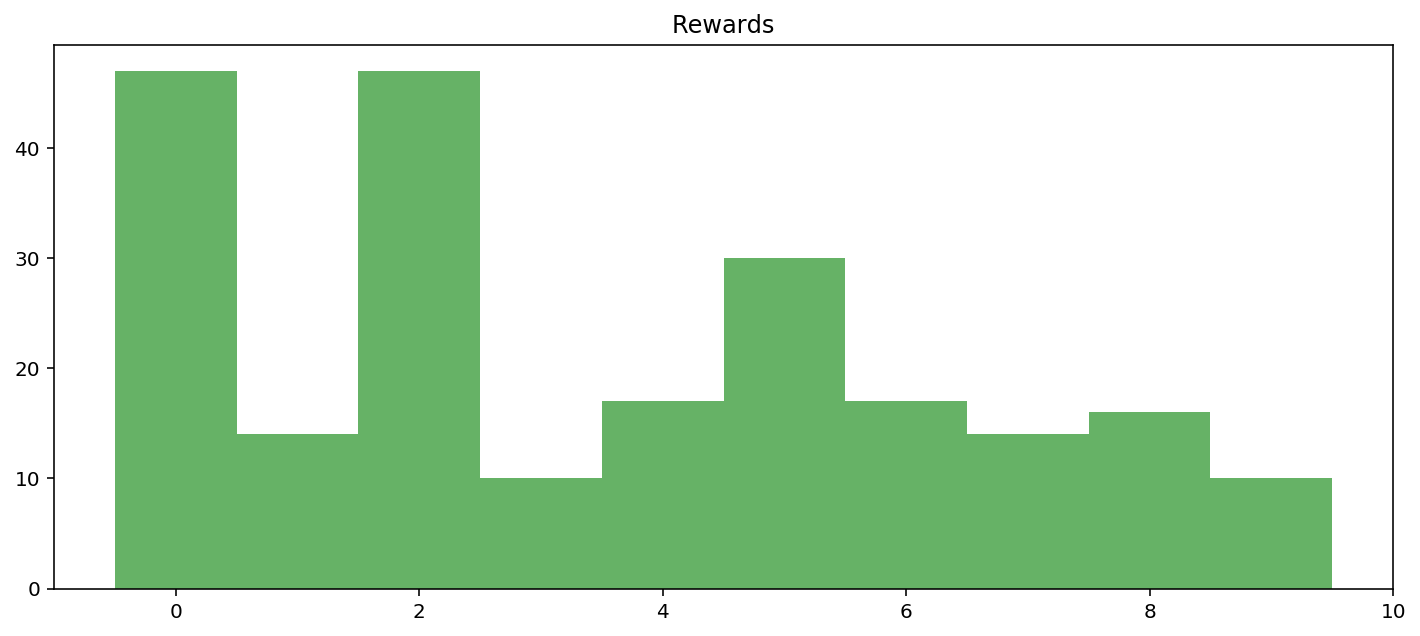

TypeError: a bytes-like object is required, not 'str'

In [7]:
qnet_agent = QNet_Agent()

steps_total = []
frames_total = 0 
shadow_run = {}
num_episodes = 10

for i_episode in range(num_episodes):
    # Episode Initializations
    state = env.reset()
    shadow_run[i_episode] = {}
    actions, states, shots = [], [], []
    step = 0

    while True:
        step += 1
        frames_total += 1
        
        epsilon = calculate_epsilon(frames_total)
        
        #action = env.action_space.sample()
        action = qnet_agent.select_action(state, epsilon)
        
        new_state, reward, done, info = env.step(action)
        rendered = env.render(mode = 'rgb_array')
        
        # Agent Optimize
        qnet_agent.optimize(state, action, new_state, reward, done)

        # Store states for step
        actions.append(action)
        states.append(new_state)
        shots.append(rendered)
                  
        if done:
            steps_total.append(step)
            shadow_run[i_episode]["actions"] = actions
            shadow_run[i_episode]["states"] = states
            shadow_run[i_episode]["shots"] = shots
            shadow_run[i_episode]["steps"] = step
            
            print("Episode {} finished after {} steps".format(i_episode, step))
            break
        
        state = new_state


print("Average reward: {:.2f}".format(sum(steps_total)/num_episodes))

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), 
        steps_total, 
        alpha=0.6, 
        color='green',
        width= 1)
plt.show()

env.close()
env.env.close()

display_frames_as_gif(shadow_run[num_episodes - 1]["shots"], "Episode {}".format(num_episodes - 1))
display_frames(num_episodes-1)

In [4]:
display_frames_as_gif(shadow_run[num_episodes - 1]["shots"], "Episode {}".format(num_episodes - 1))
display_frames(num_episodes-1)

NameError: name 'shadow_run' is not defined

In [20]:
shadow_run[567]

{'actions': [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
 'states': [array([ 0.03926236, -0.20179164,  0.03274187,  0.26852928]),
  array([ 0.03522653, -0.39736518,  0.03811245,  0.57135676]),
  array([ 0.02727923, -0.20279783,  0.04953959,  0.29092001]),
  array([ 0.02322327, -0.39858987,  0.05535799,  0.59880645]),
  array([ 0.01525147, -0.20428438,  0.06733412,  0.32406162]),
  array([ 0.01116578, -0.40029726,  0.07381535,  0.63719595]),
  array([ 0.00315984, -0.20627809,  0.08655927,  0.36864171]),
  array([-0.00096572, -0.40251646,  0.0939321 ,  0.68731387]),
  array([-0.00901605, -0.20881518,  0.10767838,  0.42561826]),
  array([-0.01319236, -0.40528445,  0.11619075,  0.75021163]),
  array([-0.02129804, -0.60180088,  0.13119498,  1.07708202]),
  array([-0.03333406, -0.40863277,  0.15273662,  0.82828067]),
  array([-0.04150672, -0.60547605,  0.16930223,  1.16483841]),
  array([-0.05361624, -0.41291298,  0.192599  ,  0.92966096]),
  array([-0.0618745 , -0.61003943,  0.21119222,  

/Users/michaelruggiero/anaconda3/envs/liveramp/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Users/michaelruggiero/anaconda3/envs/liveramp/lib/python3.6/site-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


			 *** Episode 10 at Total Seconds 2.305120***
                         Average Reward for last 10 steps: 17.700000
                         Average Reward for all steps: 18.363636
                         Epsilon: 0.010275607221522577, Frames Total :202
                         Solved 0 Times
                      
			 *** Episode 20 at Total Seconds 3.918853***
                         Average Reward for last 10 steps: 22.900000
                         Average Reward for all steps: 20.523810
                         Epsilon: 0.010000028983654138, Frames Total :431
                         Solved 0 Times
                      


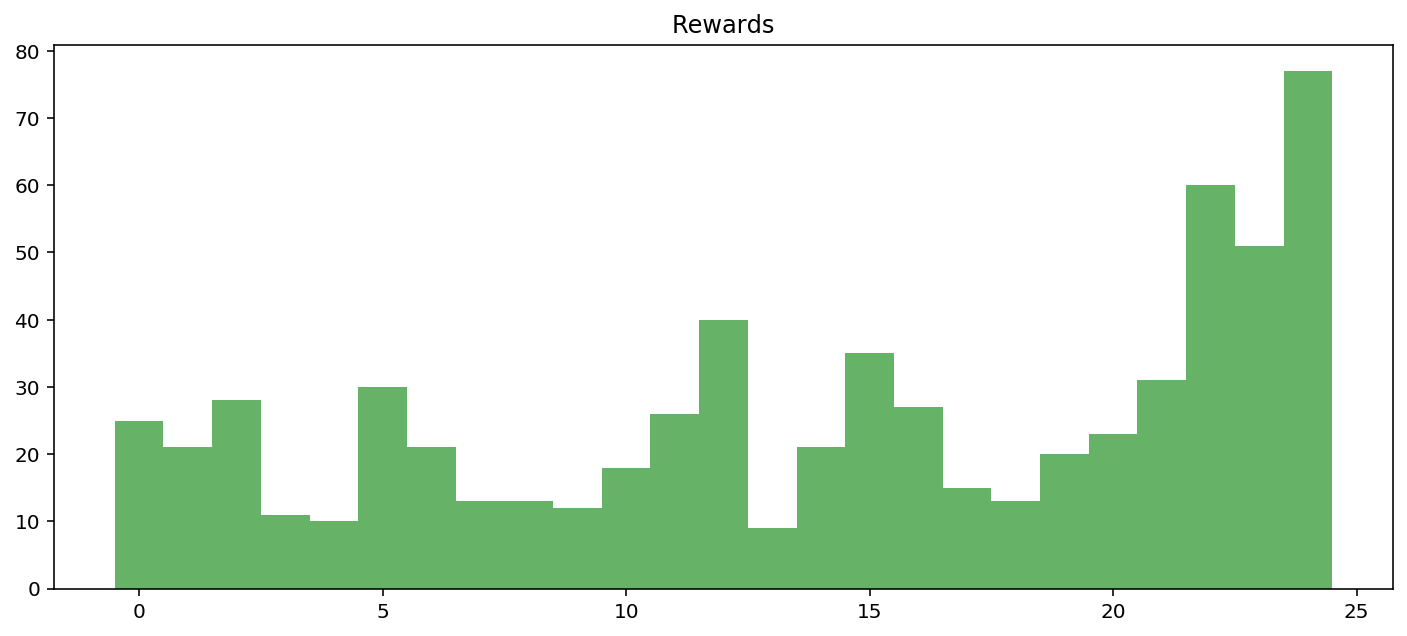

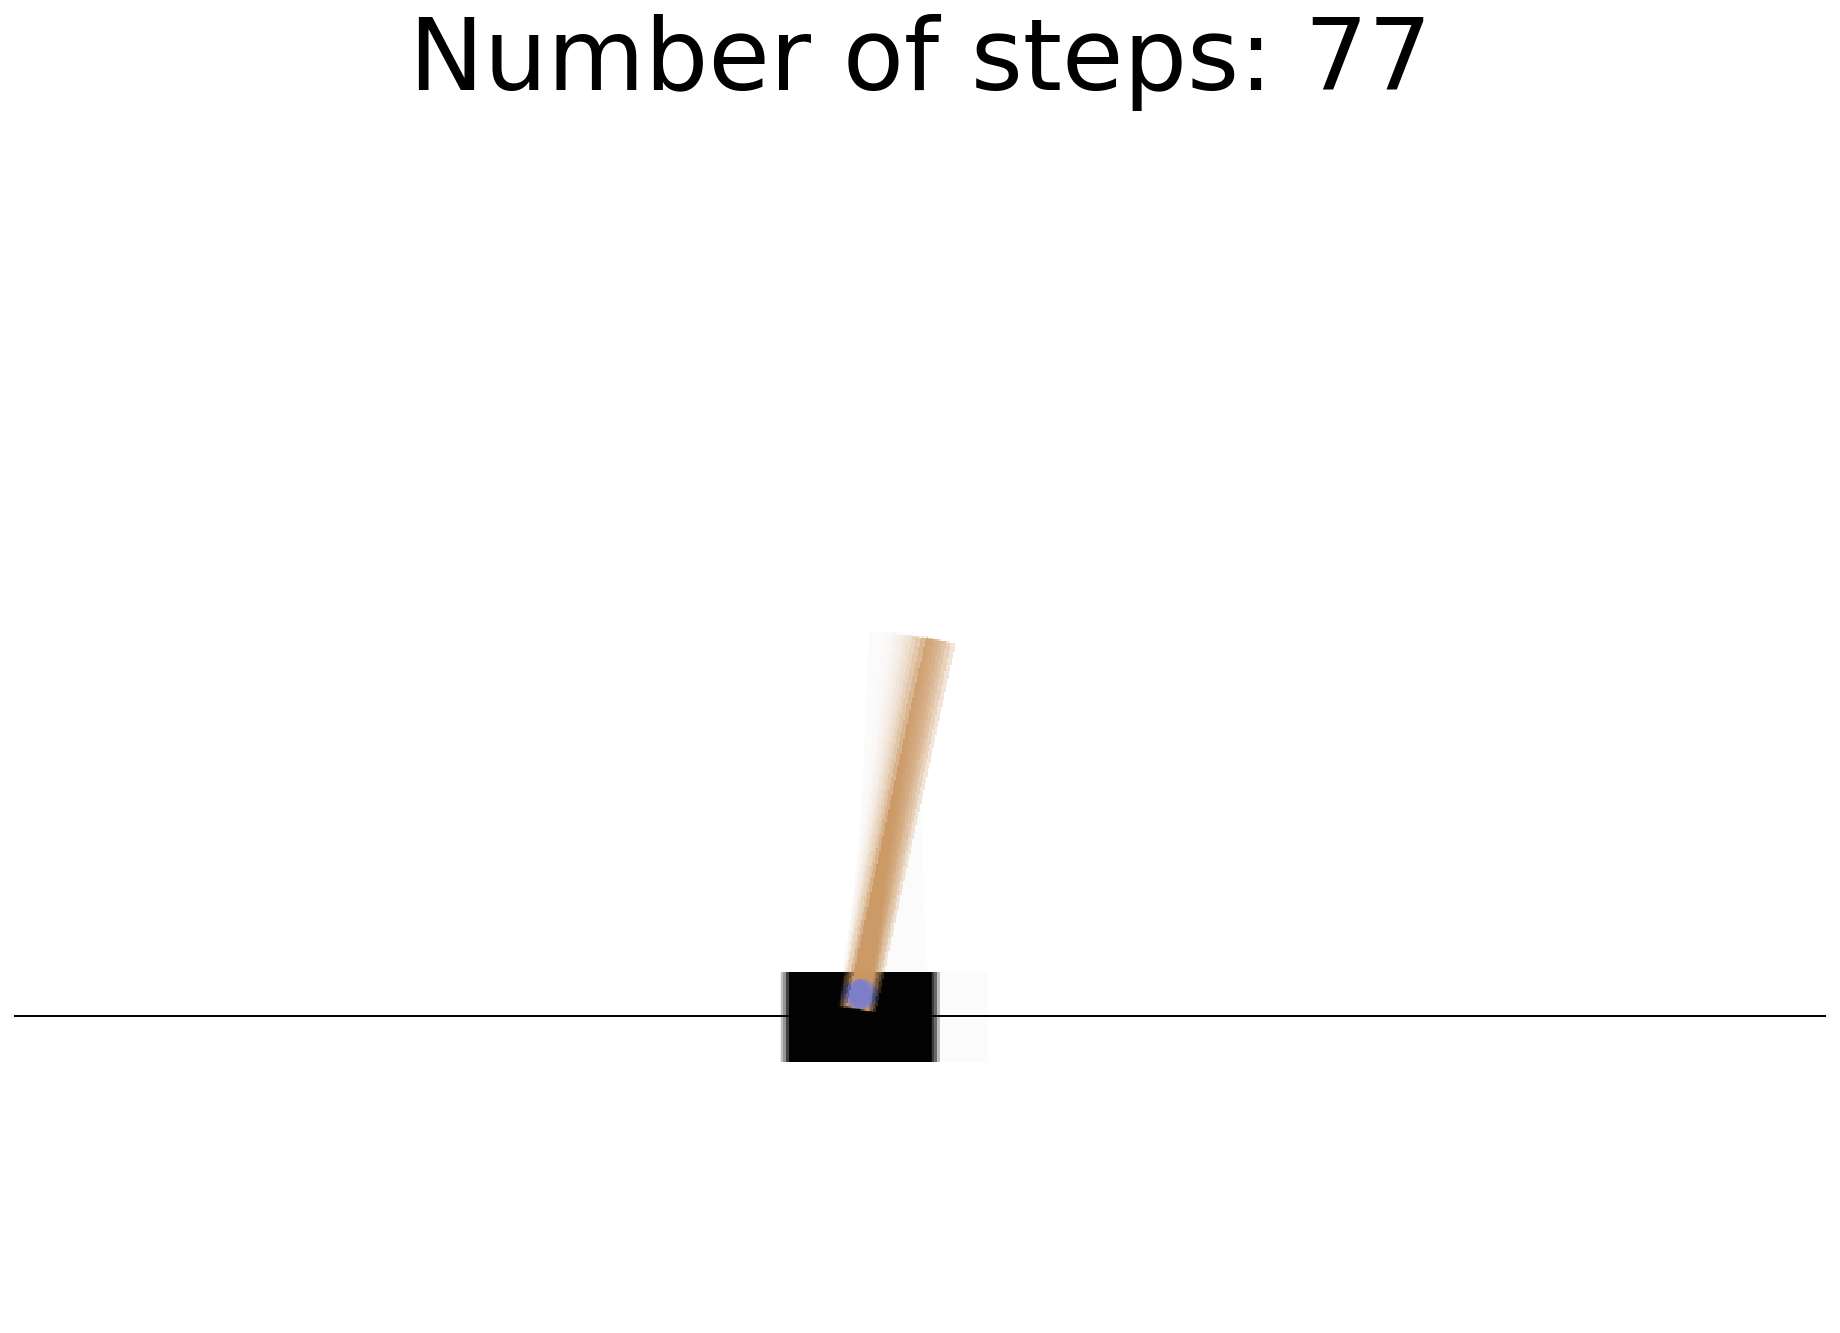

In [2]:
#Modified this code from https://nbviewer.jupyter.org/github/patrickmineault/
#xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

from time import time
import gym
import math
%config InlineBackend.figure_format = 'retina'

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Tensor = torch.Tensor

env = gym.make('CartPole-v0')

###### PARAMS ######
learning_rate = 0.02
num_episodes = 25
gamma = 0.99

egreedy = 0.9
egreedy_final = 0.01
egreedy_decay = num_episodes
report_interval = 10

hidden_layer = 64

score_to_solve = 195
solved = 0
####################

inputs = env.observation_space.shape[0]
outputs = env.action_space.n

def gif_maker(frames, title = ""):
    plt.figure(figsize=(frames[0].shape[1] / 72.0,
               frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    plt.title(title, fontdict={'fontsize': 50, 'fontweight': 'medium'})
    

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(),
                                   animate, 
                                   frames = len(frames),
                                   interval=50)
                                   
    display(display_animation(anim, default_mode='loop'))

def display_frames(episode):
    plt.figure(figsize=(shadow_run[episode]["shots"][0].shape[1] / 72.0,
                        shadow_run[episode]["shots"][0].shape[0] / 72.0))
    
    for i in shadow_run[episode]["shots"]:
        plt.imshow(i, alpha = .25)
    plt.axis('off');
    plt.title("Number of steps: {}".format(shadow_run[episode]["steps"]),
              fontdict={'fontsize': 50, 'fontweight': 'medium'});

# Torch Template
def calculate_epsilon(steps_done):
    epsilon = egreedy_final + (egreedy - egreedy_final) * \
              math.exp(-1. * steps_done / egreedy_decay )
    return epsilon

#Code Borrowed heavily from Atamai Udemy Course
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(inputs,hidden_layer)
        self.linear2 = nn.Linear(hidden_layer,outputs)
        
        self.activation = nn.Tanh()
        
    def forward(self, x):
        output1 = self.linear1(x)
        output1 = self.activation(output1)
        output2 = self.linear2(output1)

        return output2
    
class QNet_Agent(object):
    def __init__(self):
        self.nn = NeuralNetwork().to(device)

        self.loss_func = nn.MSELoss()
        #self.loss_func = nn.SmoothL1Loss()
        
        self.optimizer = optim.Adam(params=self.nn.parameters(), lr=learning_rate)
        #self.optimizer = optim.RMSprop(params=mynn.parameters(), lr=learning_rate)
        
    def select_action(self,state,epsilon):
        
        random_for_egreedy = torch.rand(1)[0]
        
        if random_for_egreedy > epsilon:      
            
            with torch.no_grad():
                
                state = Tensor(state).to(device)
                action_from_nn = self.nn(state)
                action = torch.max(action_from_nn,0)[1]
                action = action.item()        
        else:
            action = env.action_space.sample()
        
        return action
    
    def optimize(self, state, action, new_state, reward, done):
        
        state = Tensor(state).to(device)
        new_state = Tensor(new_state).to(device)
        
        reward = Tensor([reward]).to(device)
        
        if done:
            target_value = reward
        else:
            new_state_values = self.nn(new_state).detach()
            max_new_state_values = torch.max(new_state_values)
            target_value = reward + gamma * max_new_state_values
        
        predicted_value = self.nn(state)[action]
        
        loss = self.loss_func(predicted_value, target_value)
    
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
qnet_agent = QNet_Agent()

steps_total = []
frames_total = 0 
shadow_run = {}
start_time = time()


for episode in range(num_episodes):
    # Episode Initializations
    state = env.reset()
    shadow_run[episode] = {}
    actions, states, shots = [], [], []
    step = 0

    while True:
        step += 1
        frames_total += 1
        
        epsilon = calculate_epsilon(frames_total)
        
        #action = env.action_space.sample()
        action = qnet_agent.select_action(state, epsilon)
        
        new_state, reward, done, info = env.step(action)
        rendered = env.render(mode = 'rgb_array')
        
        # Agent Optimize
        qnet_agent.optimize(state, action, new_state, reward, done)

        # Store states for step
        actions.append(action)
        states.append(new_state)
        shots.append(rendered)
                  
        if done:
            steps_total.append(step)
            shadow_run[episode]["actions"] = actions
            shadow_run[episode]["states"] = states
            shadow_run[episode]["shots"] = shots
            shadow_run[episode]["steps"] = step
            
            if step >= score_to_solve: solved += 1
            
            if episode % report_interval == 0 and episode != 0:
                print("""\t\t\t *** Episode {} at Total Seconds {:2f}***
                         Average Reward for last {} steps: {:2f}
                         Average Reward for all steps: {:2f}
                         Epsilon: {}, Frames Total :{}
                         Solved {} Times
                      """.format(episode,
                           (time() - start_time),
                           str(report_interval),
                           sum(steps_total[-report_interval:])/report_interval,
                           sum(steps_total)/len(steps_total),
                           epsilon,
                           frames_total,
                           solved))
                    
            break
        
        state = new_state

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), 
        steps_total, 
        alpha=0.6, 
        color='green',
        width= 1)
plt.show()

env.close()
env.env.close()

#gif_maker(shadow_run[num_episodes - 1]["shots"], "Episode {}".format(num_episodes - 1))
display_frames(num_episodes-1)

In [4]:
shadow_run[220]["steps"]

200

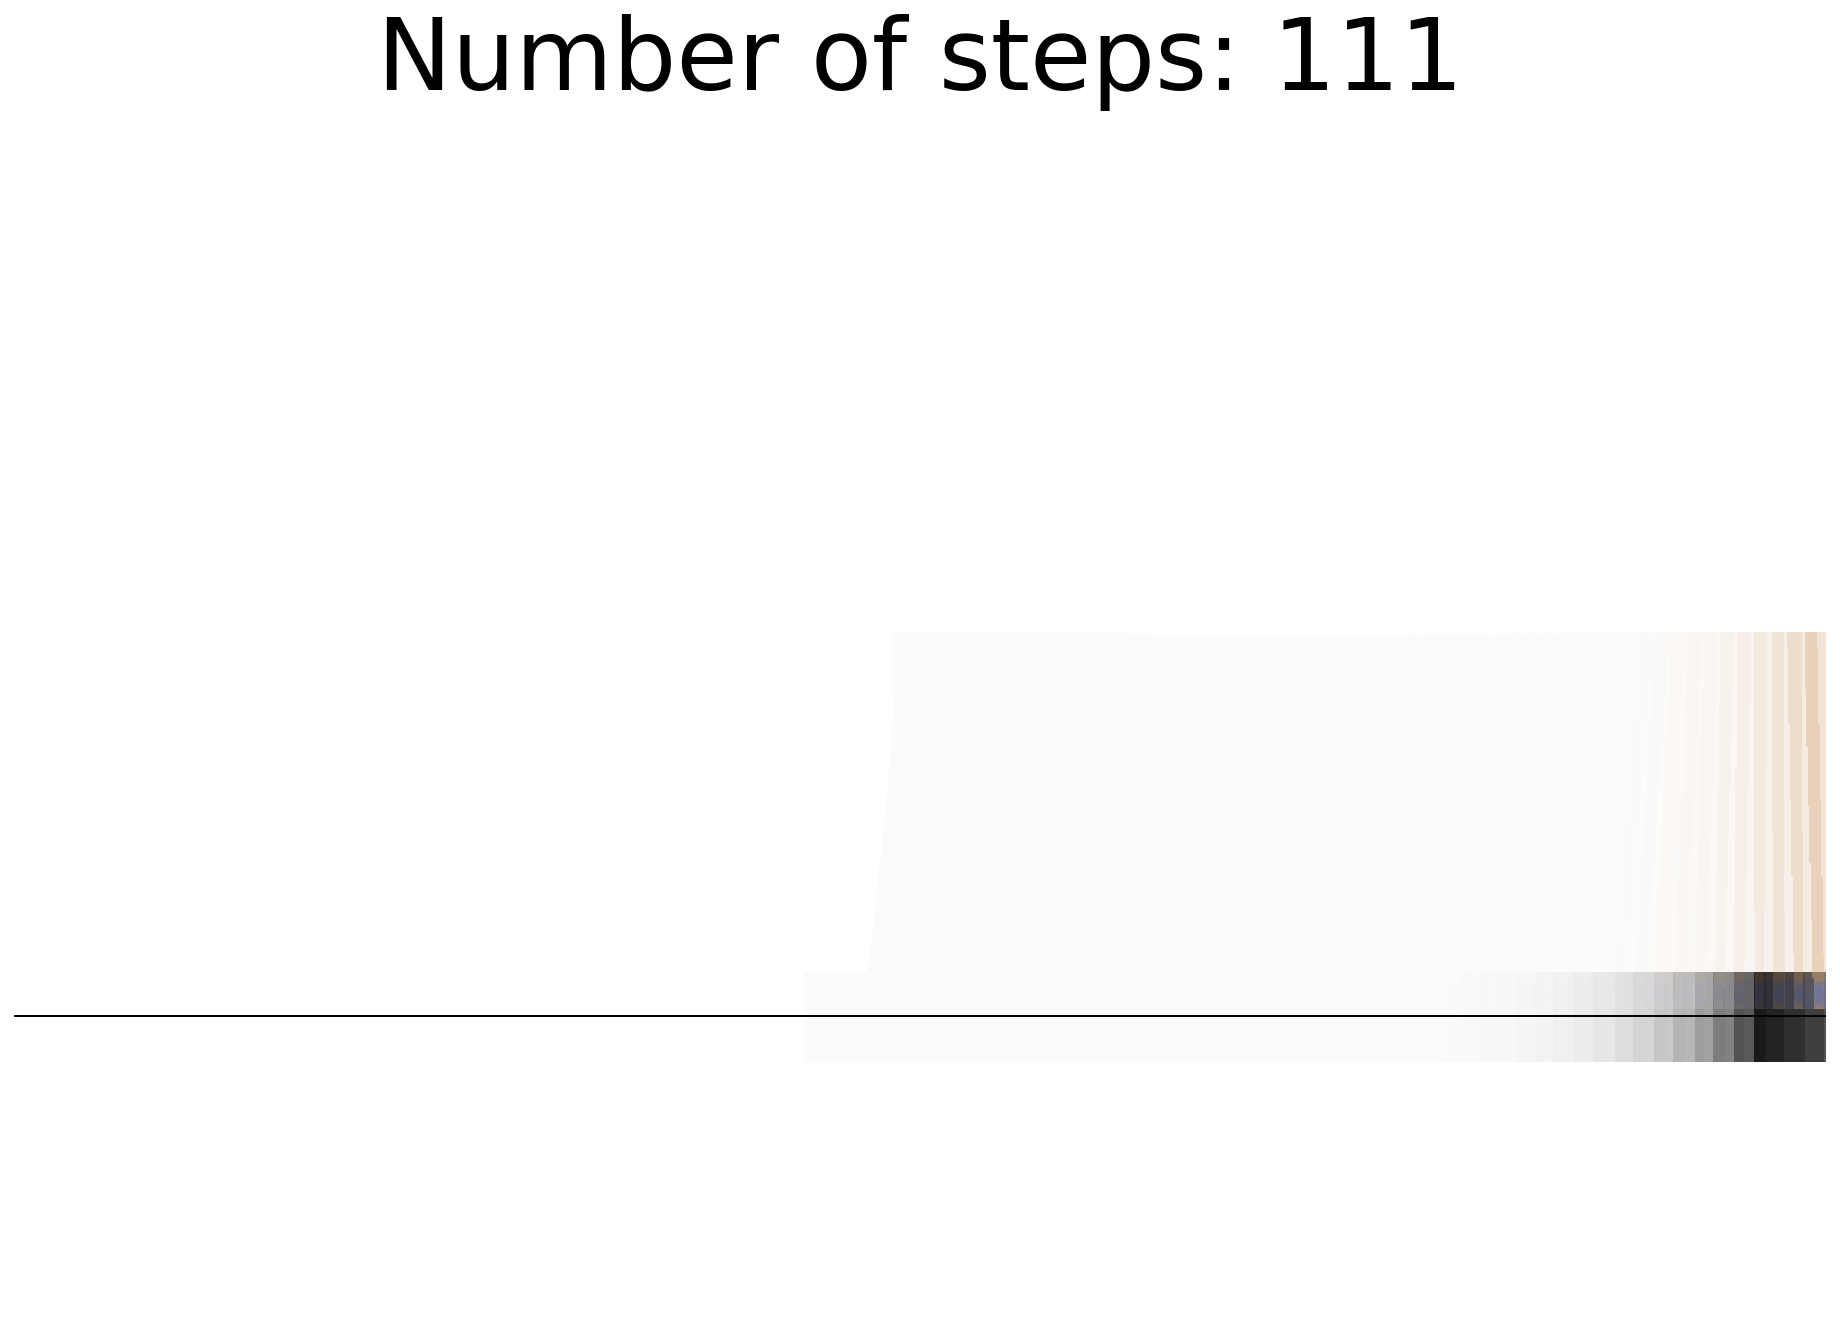

In [2]:
display_frames(num_episodes-1)

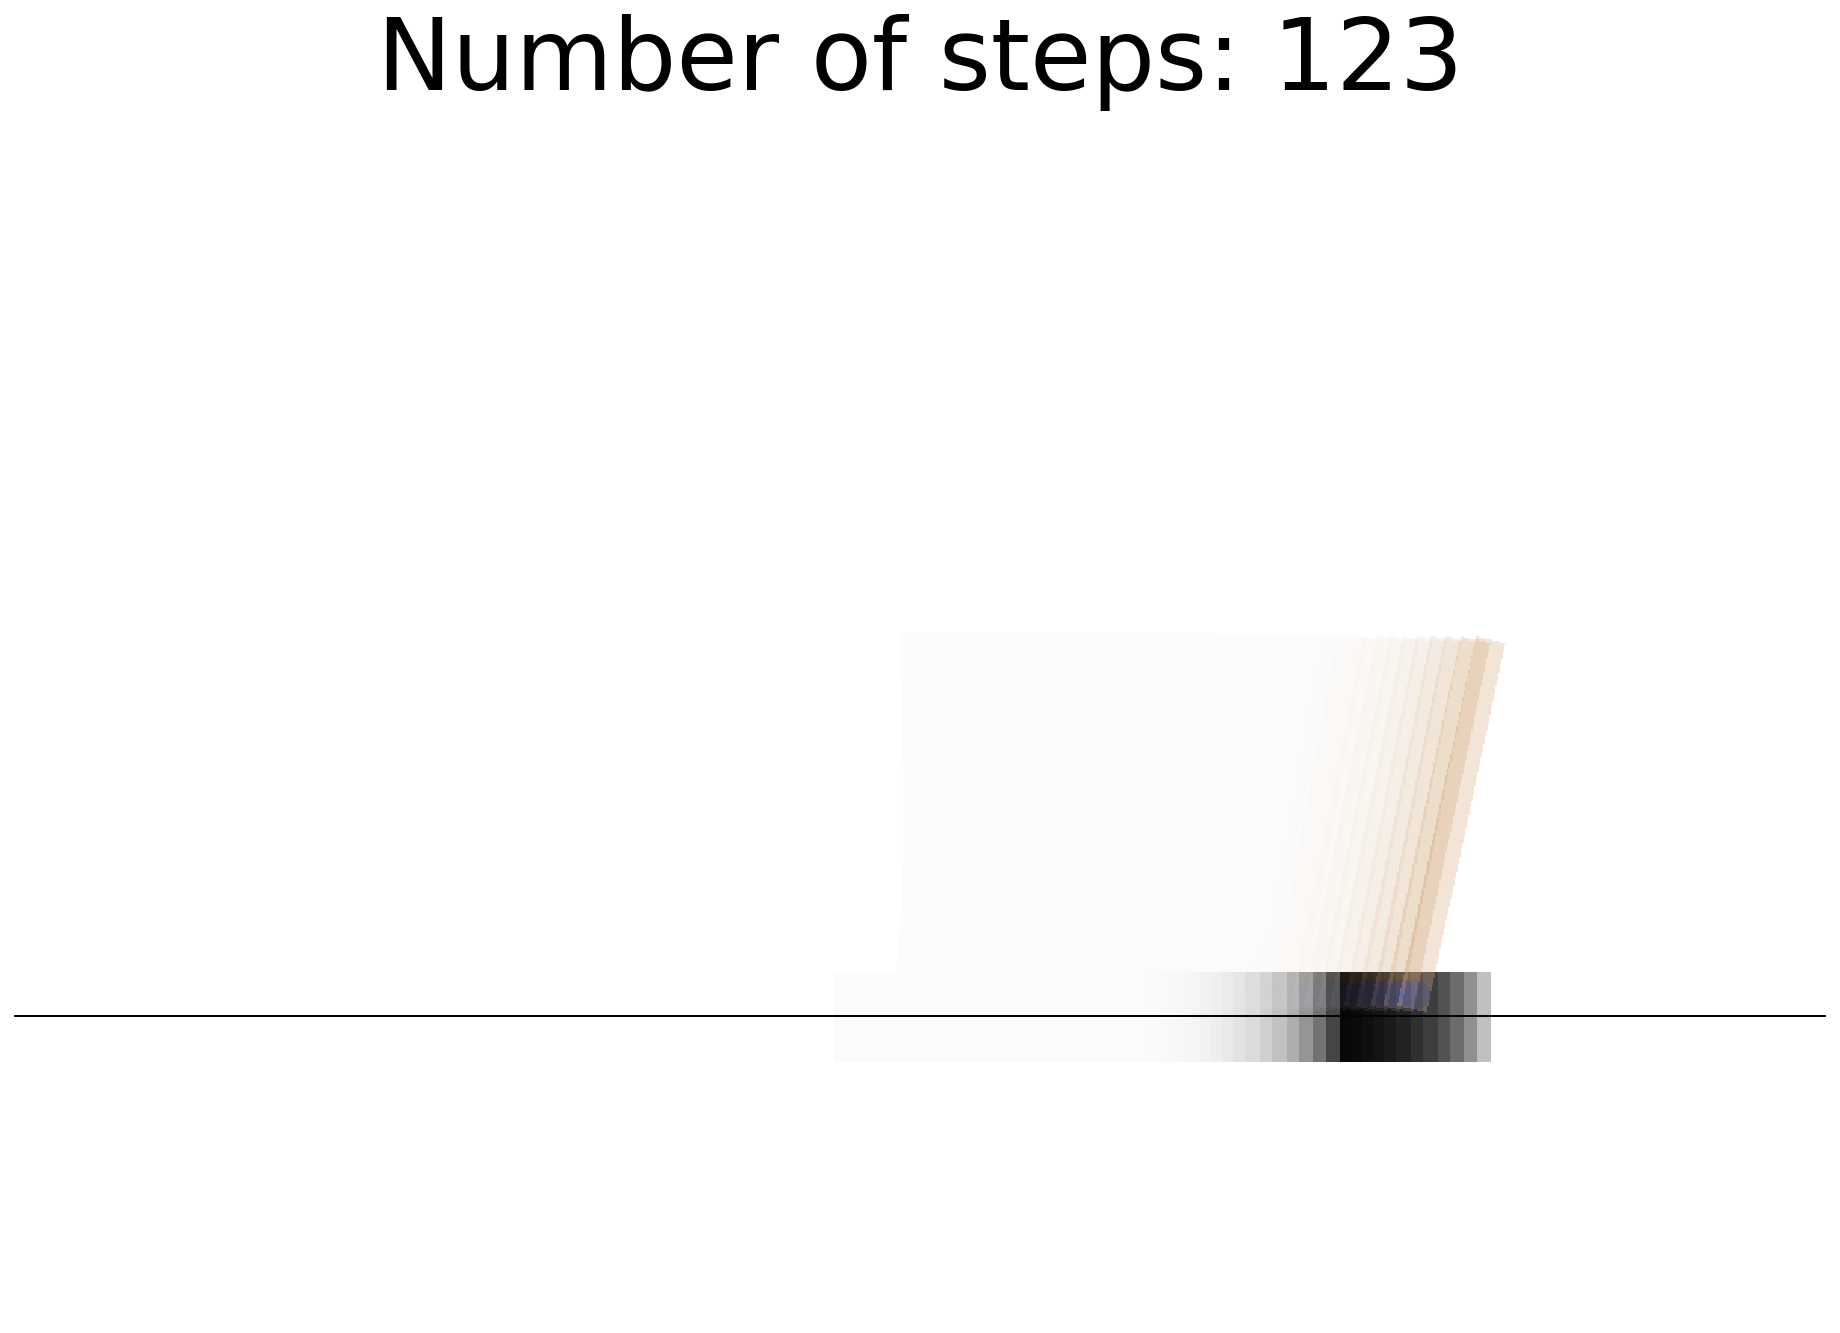

In [6]:
display_frames(num_episodes-1)

In [8]:
shadow_run[0]["shots"]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  